# Results visualization

This notebook provides a similar functionality to the visualization of the dataset, with the difference that this time we will compare the real data with the detected rings. The first step for this is to read the results and extract all the examples from it

In [2]:
import json, math, random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
RESULTS_PATH = "../results/results_2023-04-28 20:38:32.563698.json"

In [4]:
f = open(f"{RESULTS_PATH}")
results = json.load(f)

## Plotting

We define the function to plot the results. We want it to be in a 100x100 plane and assign different colors to the points depending on their circunference. We will compare the results to the data by drawing a circunference where detected

In [117]:
def plot_data(data):
    points = []
    c = []
    for key, circ in data["circunferences"].items():
        points.extend(circ["points"])
        
        # We set the color for the set, making sure its different for each set
        set_color = random.randint(0, 100)
        while(set_color in c):
            set_color = random.randint(0, 100)
        c.extend([set_color for _ in circ["points"]])
    
    noise = list(*data["noise"])
    points.extend(noise)
    set_color = random.randint(0, 100)
    while(set_color in c):
        set_color = random.randint(0, 100)
    c.extend([set_color for _ in noise])

    rings = []
    for det_center_ind, _ in data["pairs"]:
        points.append(data["predicted_centers"][det_center_ind])
        rings.append(plt.Circle(data["predicted_centers"][det_center_ind], data["predicted_radii"][det_center_ind], fill=False))
        c.append(0.0)

    fig = plt.figure(figsize=(5, 5), dpi=100)
    ax = fig.add_subplot()
    ax.scatter(*zip(*points), s=10, c=c)
    for r in rings:
        ax.add_artist( r )
    ax.set(xlim=(0, 100), ylim=(0, 100))
    ax.set_aspect('equal')

    fig.show()

/tmp/ipykernel_4465/2028024053.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_4465/2028024053.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(5, 5), dpi=100)


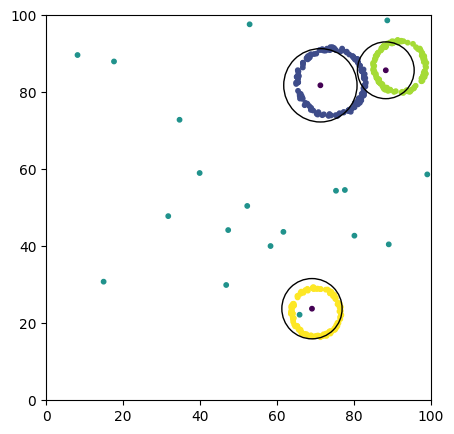

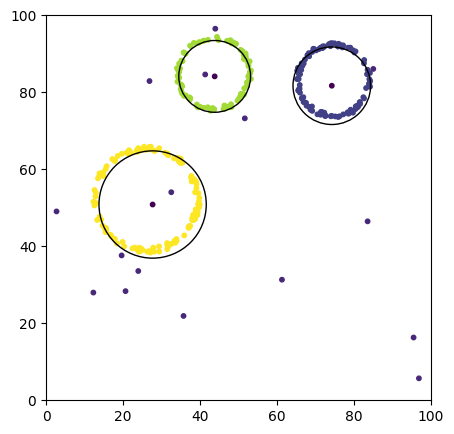

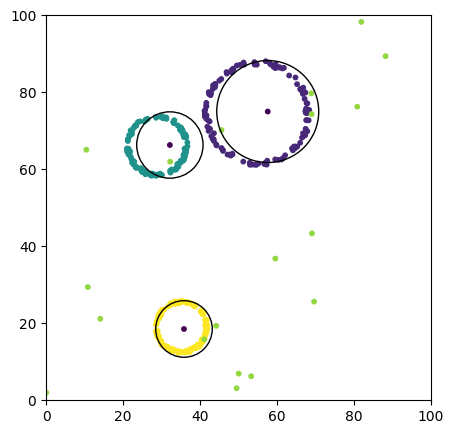

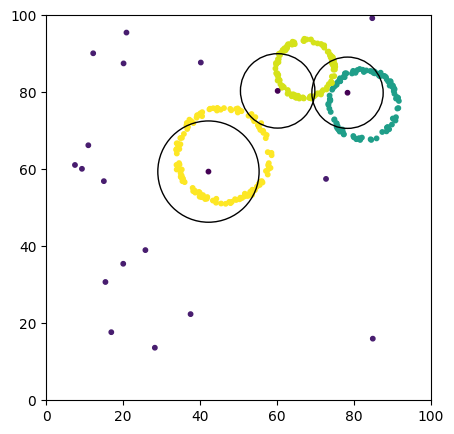

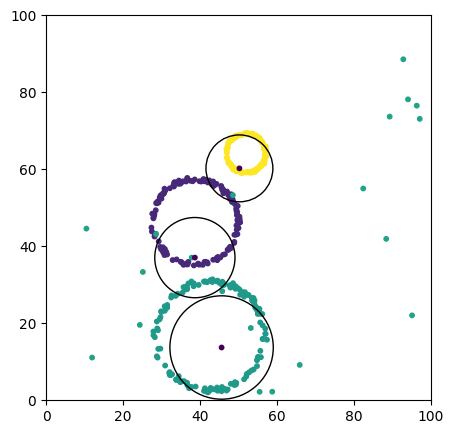

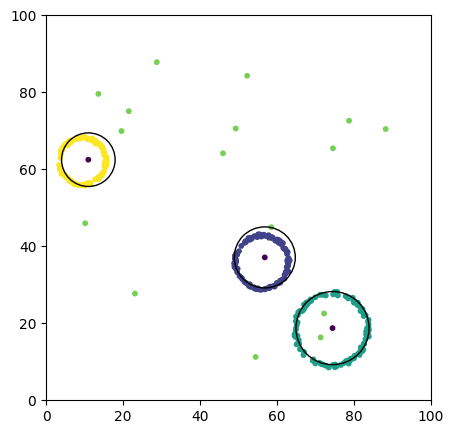

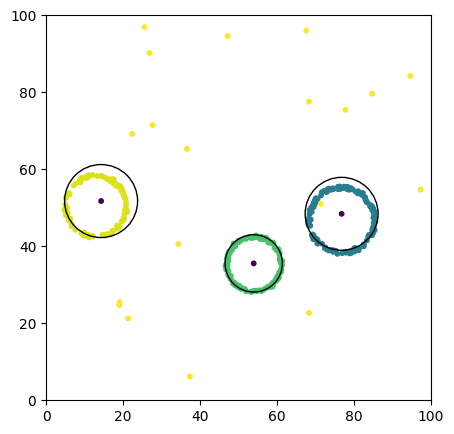

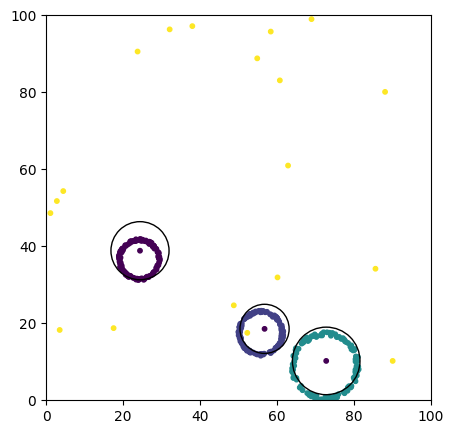

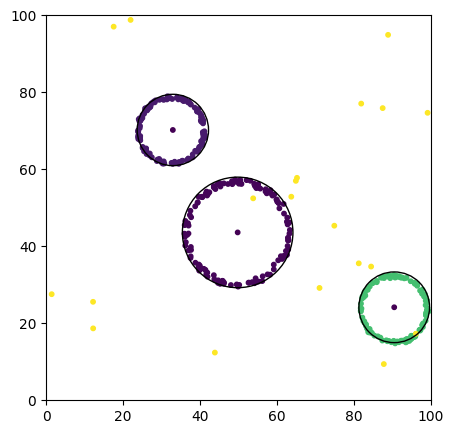

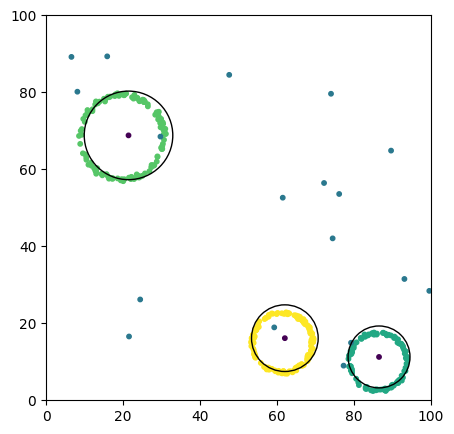

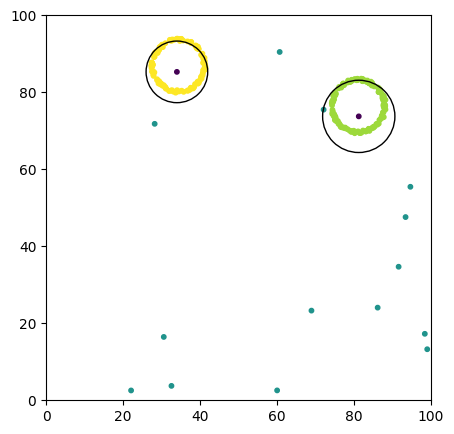

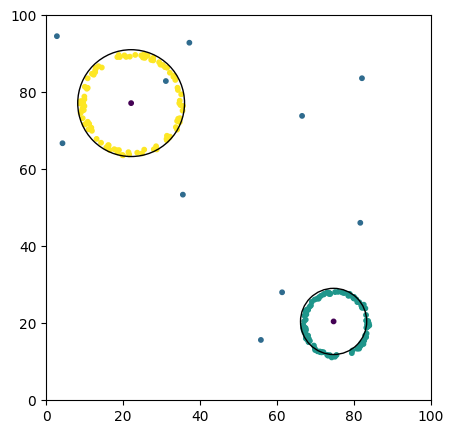

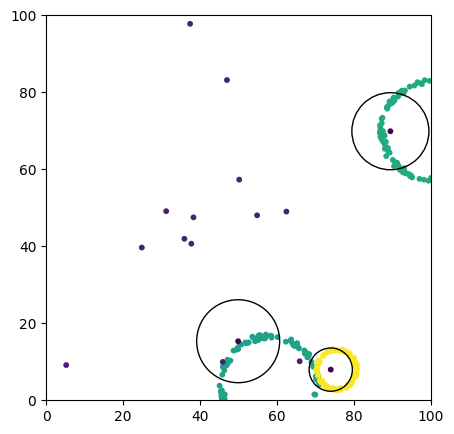

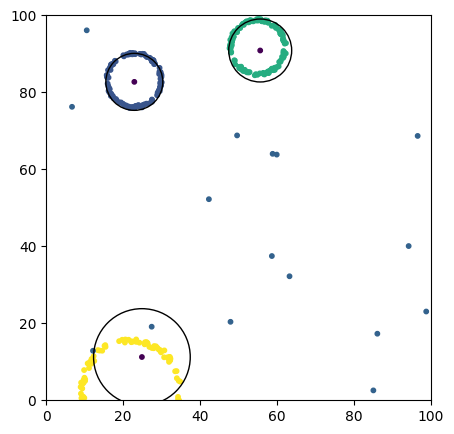

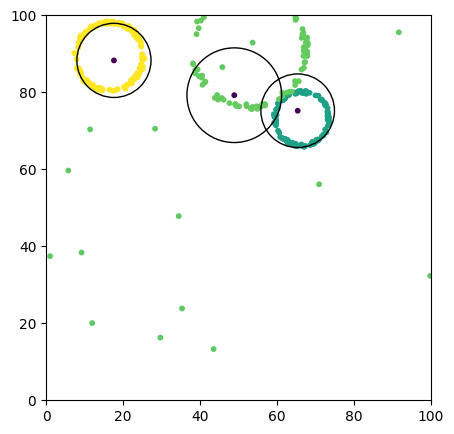

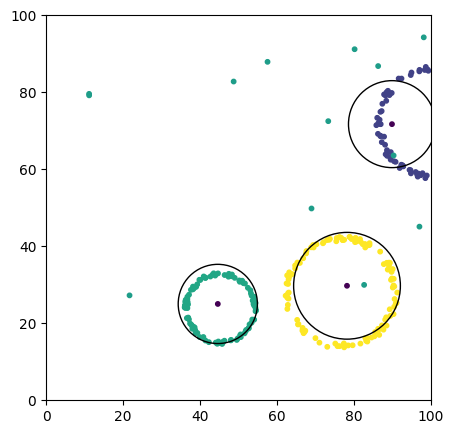

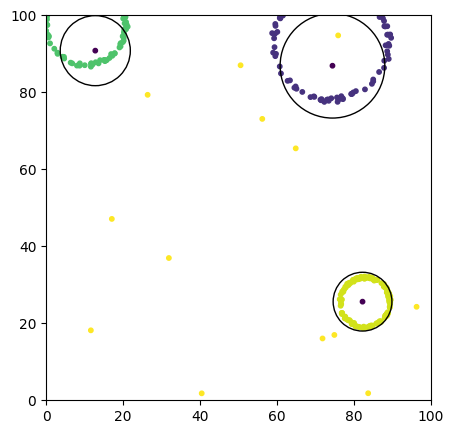

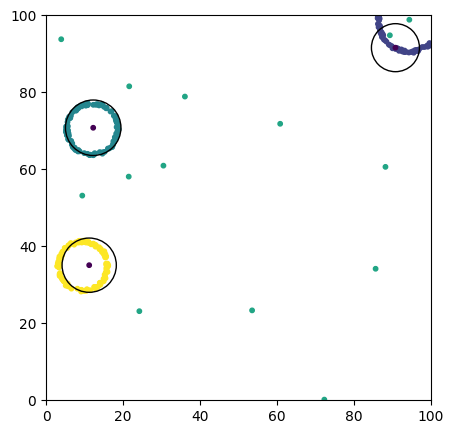

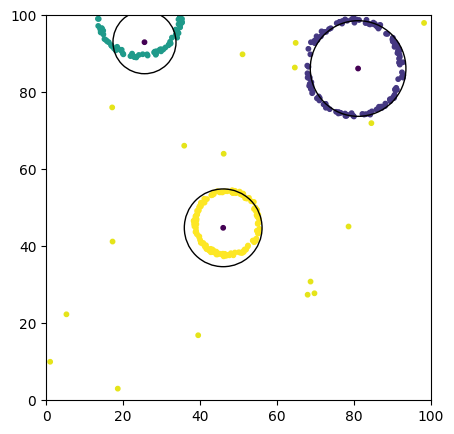

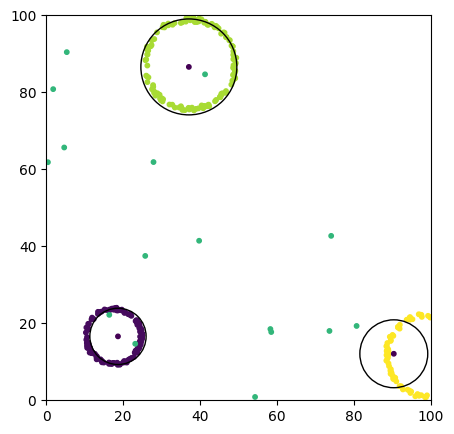

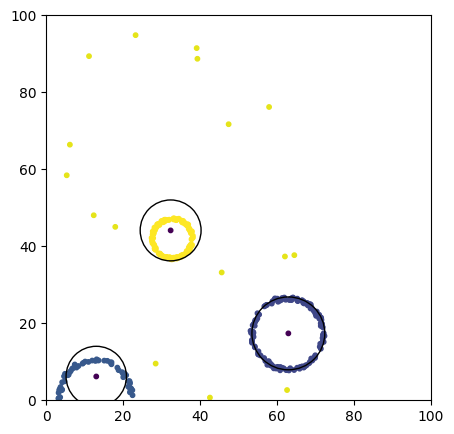

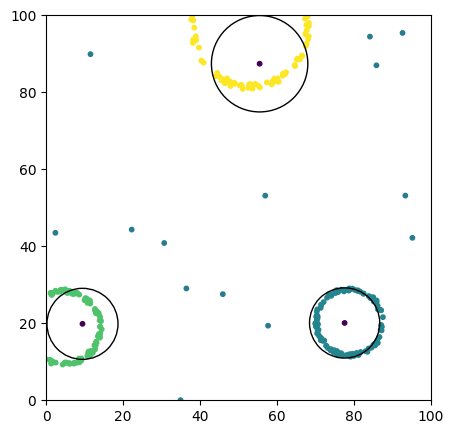

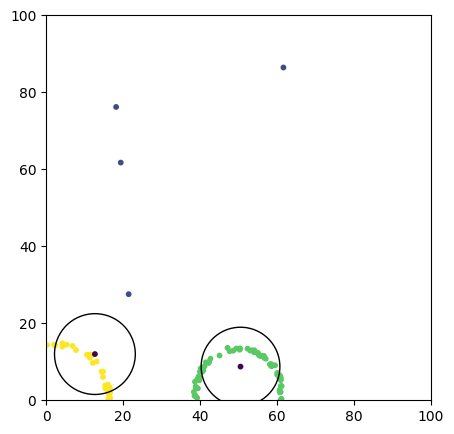

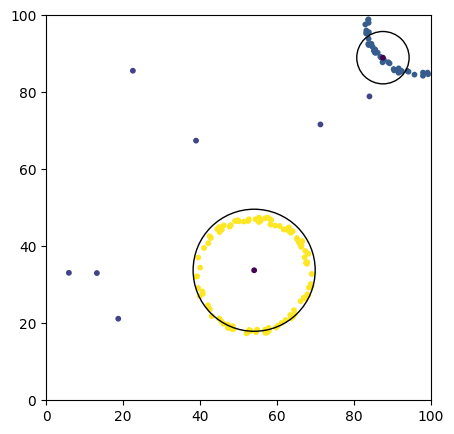

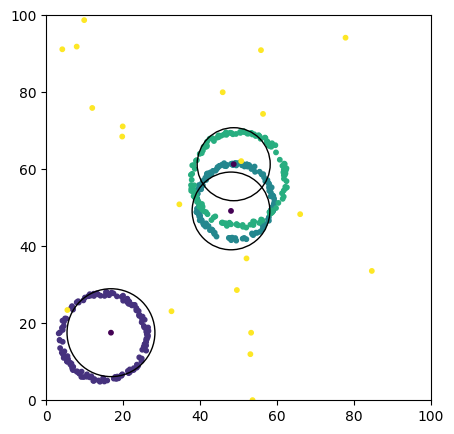

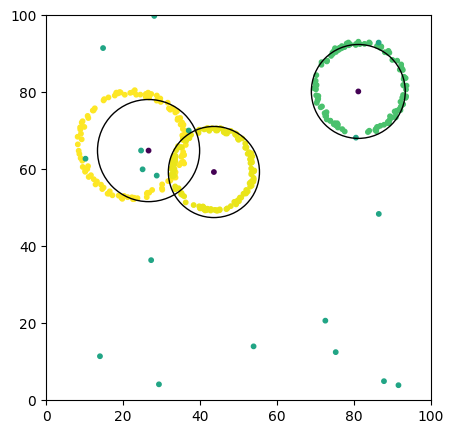

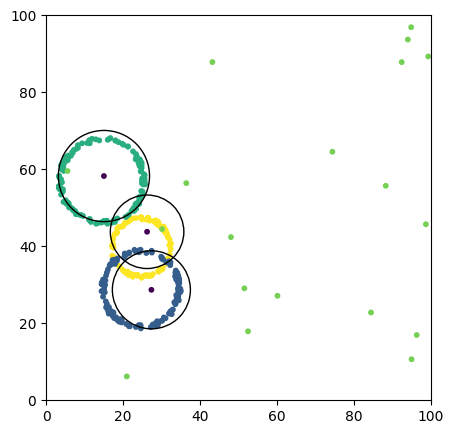

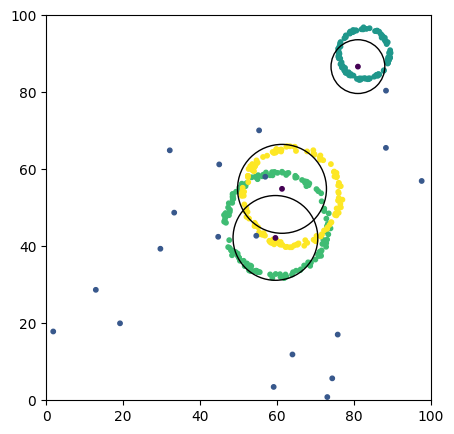

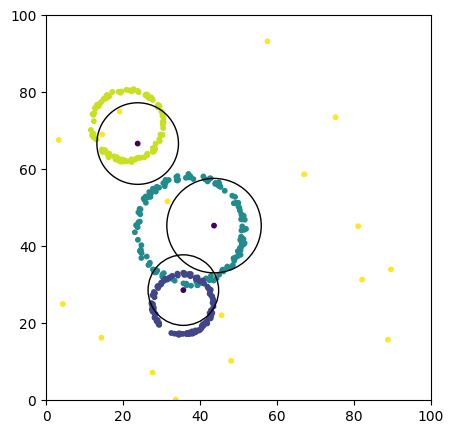

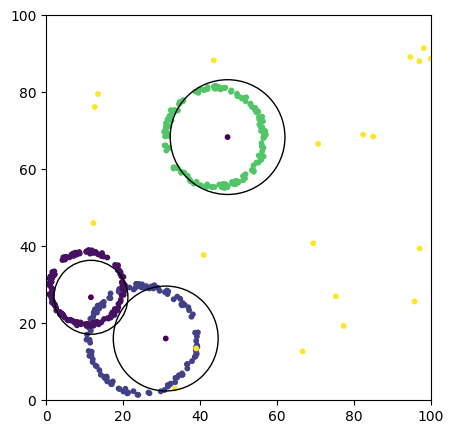

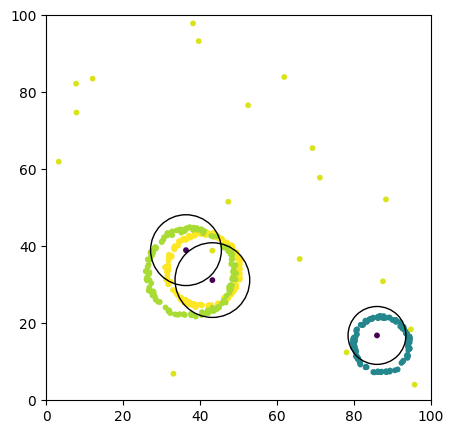

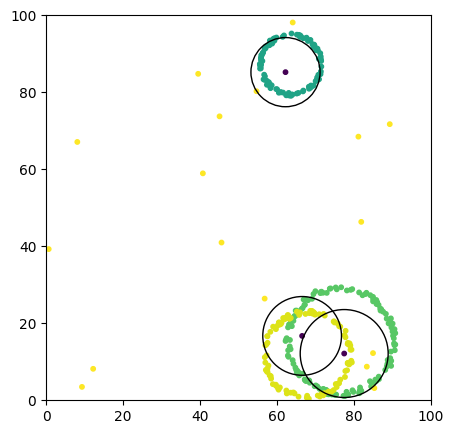

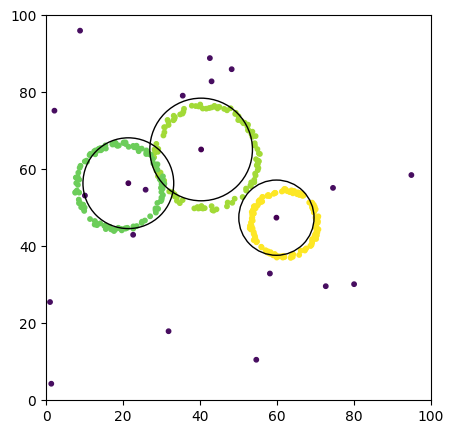

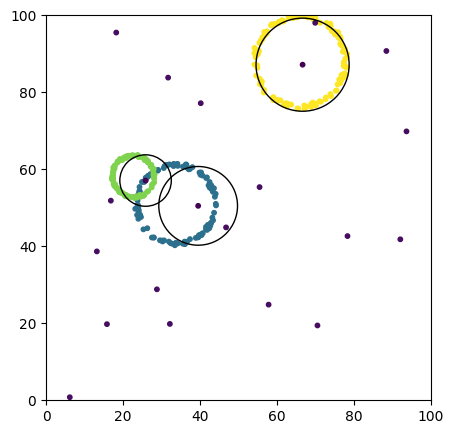

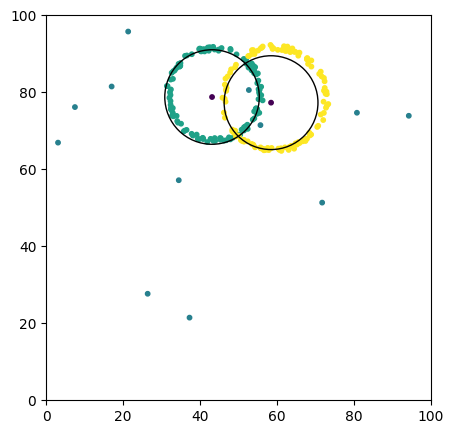

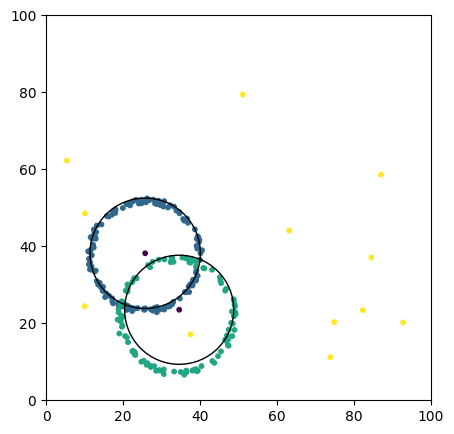

In [118]:
for set_type in ["clean", "extends", "collides"]:
    for filename in results[set_type]:
        plot_data(results[set_type][filename])